# Analyzing Popular App Categories on Google Play

In this project, our aim is to analyze data from the Google Play Store to identify patterns and preferences among users with solid approach by understanding the market and making informed decisions about app development.

Our company creates free apps and gets revenue from advertising. By knowing which app categories are popular, we can assist our developers to identify popular app categories and make informed decisions about app development to maximize revenue through ad-based monetization. 

As we develop free applications. We make money through advertisements, which are only possible when there is app traffic. Therefore, our goal is to select a category with a significant number of installations so that we can continue to operate.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the dataset into Pandas dataframe objects 
android_df = pd.read_csv('googleplaystore.csv')

In [4]:
# Exploring Data using Pandas method 
android_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [5]:
# we will see category wise how many app do we have ?
android_df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [6]:
# last category above is 1.9 which is surely not a category so find out this applied boolean indexing 
android_df[android_df["Category"] == "1.9"]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [7]:
# now clean data 

android_df[android_df["Category"] == "1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [8]:
clean_lst = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'LIFESTYLE', 'February 11, 2018',
        '1.0.19', '4.0 and up']

clean_lst

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [9]:
# update now 1.9 list with clean lst 
android_df[android_df["Category"] == "1.9"] = clean_lst

In [10]:
andriod_category = android_df["Category"].value_counts()
andriod_category

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [11]:
# one app data should be once in this dataset but we have more then one 
app_count = android_df["App"].value_counts()
app_count

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [12]:
# how many duplicates do we have? Ans:798
app_count[app_count >1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

In [13]:
# checked : do we have instagram also duplicated?

"Instagram" in app_count[app_count > 1].index

True

In [14]:
# removeing duplicates 

android_df[android_df["App"] == "Instagram"]

App Category Rating   Reviews                Size        Installs  \
2545  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
2604  Instagram   SOCIAL    4.5  66577446  Varies with device  1,000,000,000+   
2611  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
3909  Instagram   SOCIAL    4.5  66509917  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres   Last Updated         Current Ver  \
2545  Free     0           Teen  Social  July 31, 2018  Varies with device   
2604  Free     0           Teen  Social  July 31, 2018  Varies with device   
2611  Free     0           Teen  Social  July 31, 2018  Varies with device   
3909  Free     0           Teen  Social  July 31, 2018  Varies with device   

             Android Ver  
2545  Varies with device  
2604  Varies with device  
2611  Varies with device  
3909  Varies with device

In [15]:
# checking for duplicates rows based on the 'App' column, marking all duplicates as true 

duplicate_apps_df = android_df[android_df.duplicated(subset=['App'], keep=False)]
duplicate_apps_df[duplicate_apps_df["App"] == "Instagram"]

App Category Rating   Reviews                Size        Installs  \
2545  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
2604  Instagram   SOCIAL    4.5  66577446  Varies with device  1,000,000,000+   
2611  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
3909  Instagram   SOCIAL    4.5  66509917  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres   Last Updated         Current Ver  \
2545  Free     0           Teen  Social  July 31, 2018  Varies with device   
2604  Free     0           Teen  Social  July 31, 2018  Varies with device   
2611  Free     0           Teen  Social  July 31, 2018  Varies with device   
3909  Free     0           Teen  Social  July 31, 2018  Varies with device   

             Android Ver  
2545  Varies with device  
2604  Varies with device  
2611  Varies with device  
3909  Varies with device

In [16]:
# it kept first and showed other three
duplicate_apps_df = android_df[android_df.duplicated(subset=['App'], keep="first")]
duplicate_apps_df[duplicate_apps_df["App"] == "Instagram"]

App Category Rating   Reviews                Size        Installs  \
2604  Instagram   SOCIAL    4.5  66577446  Varies with device  1,000,000,000+   
2611  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
3909  Instagram   SOCIAL    4.5  66509917  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres   Last Updated         Current Ver  \
2604  Free     0           Teen  Social  July 31, 2018  Varies with device   
2611  Free     0           Teen  Social  July 31, 2018  Varies with device   
3909  Free     0           Teen  Social  July 31, 2018  Varies with device   

             Android Ver  
2604  Varies with device  
2611  Varies with device  
3909  Varies with device

In [17]:
# it kept last and showed last three
duplicate_apps_df = android_df[android_df.duplicated(subset=['App'], keep="last")]
duplicate_apps_df[duplicate_apps_df["App"] == "Instagram"]

App Category Rating   Reviews                Size        Installs  \
2545  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
2604  Instagram   SOCIAL    4.5  66577446  Varies with device  1,000,000,000+   
2611  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres   Last Updated         Current Ver  \
2545  Free     0           Teen  Social  July 31, 2018  Varies with device   
2604  Free     0           Teen  Social  July 31, 2018  Varies with device   
2611  Free     0           Teen  Social  July 31, 2018  Varies with device   

             Android Ver  
2545  Varies with device  
2604  Varies with device  
2611  Varies with device

In [18]:
# we can check numbers by putting index (can see numbers which are to drop)
duplicate_apps_df = android_df[android_df.duplicated(subset=['App'], keep="last")]
#duplicate_apps_df[duplicate_apps_df["App"] == "Instagram"].index

In [19]:
# no of duplicate Apps with nunique ... if want names only then write unique only
num_duplicate_df = duplicate_apps_df['App'].nunique()
num_duplicate_df

798

In [20]:
#how many total we have?
duplicate_apps_df.shape

(1181, 13)

In [21]:
#how many rows in data in total
android_df.shape[0]

10841

In [22]:
#how many duplicate values do we have ? we should be left with 9660 rows record after removing 
#duplicates

10841-1181

9660

In [23]:
# group by 'App' and get the maximum number of reviews for each app
#groupby se backend per app kay max reviews ka table bun jay ga 

reviews_max = android_df.groupby('App')['Reviews'].max()

In [24]:
reviews_max["Instagram"]

'66577446'

In [25]:
# it is basically a series
reviews_max

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [26]:
#dataframe per loop chalana hai to do this ... aik mae index number ay ga aik mae pura record ay ga 
# index number mae index number jay ga aur row mae pura record ay ga 
for index,row in android_df.iterrows():
    print(row)

App               Photo Editor & Candy Camera & Grid & ScrapBook
Category                                          ART_AND_DESIGN
Rating                                                       4.1
Reviews                                                      159
Size                                                         19M
Installs                                                 10,000+
Type                                                        Free
Price                                                          0
Content Rating                                          Everyone
Genres                                              Art & Design
Last Updated                                     January 7, 2018
Current Ver                                                1.0.0
Android Ver                                         4.0.3 and up
Name: 0, dtype: object
App                     Coloring book moana
Category                     ART_AND_DESIGN
Rating                                  3.9


App               Messenger – Text and Video Chat for Free
Category                                     COMMUNICATION
Rating                                                 4.0
Reviews                                           56642847
Size                                    Varies with device
Installs                                    1,000,000,000+
Type                                                  Free
Price                                                    0
Content Rating                                    Everyone
Genres                                       Communication
Last Updated                                August 1, 2018
Current Ver                             Varies with device
Android Ver                             Varies with device
Name: 335, dtype: object
App               WhatsApp Messenger
Category               COMMUNICATION
Rating                           4.4
Reviews                     69119316
Size              Varies with device
Installs              1

App               Learn languages, grammar & vocabulary with Mem...
Category                                                  EDUCATION
Rating                                                          4.7
Reviews                                                     1107903
Size                                             Varies with device
Installs                                                10,000,000+
Type                                                           Free
Price                                                             0
Content Rating                                             Everyone
Genres                                                    Education
Last Updated                                         August 2, 2018
Current Ver                                      Varies with device
Android Ver                                      Varies with device
Name: 737, dtype: object
App                Khan Academy
Category              EDUCATION
Rating                     

App               NetSpend Prepaid
Category                   FINANCE
Rating                         4.2
Reviews                      15993
Size                           45M
Installs                1,000,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                     Finance
Last Updated           May 9, 2018
Current Ver                 4.10.0
Android Ver             4.4 and up
Name: 1153, dtype: object
App               BBVA Compass Banking
Category                       FINANCE
Rating                             4.3
Reviews                           5905
Size                               50M
Installs                      500,000+
Type                              Free
Price                                0
Content Rating                Everyone
Genres                         Finance
Last Updated             July 27, 2018
Current Ver                      6.0.2
Android Ver                 4.4 and up
Name: 1154, 

App               Binaural Beats Meditation
Category                 LIBRARIES_AND_DEMO
Rating                                  4.3
Reviews                                 411
Size                                    95M
Installs                            50,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                     Libraries & Demo
Last Updated                   June 8, 2018
Current Ver                             5.0
Android Ver                    4.0.3 and up
Name: 1531, dtype: object
App               Essential Resources
Category           LIBRARIES_AND_DEMO
Rating                            4.6
Reviews                           237
Size                             8.5k
Installs                      50,000+
Type                             Free
Price                               0
Content Rating               Everyone
Genres               Libraries & Demo
Last Updated       Sep

App                          Fishdom
Category                        GAME
Rating                           4.6
Reviews                      2158580
Size              Varies with device
Installs                 10,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                        Puzzle
Last Updated           July 19, 2018
Current Ver                   2.21.5
Android Ver             4.0.3 and up
Name: 1895, dtype: object
App               Galaxy Attack: Alien Shooter
Category                                  GAME
Rating                                     4.6
Reviews                                 506593
Size                        Varies with device
Installs                           10,000,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                                  Arcade
Last Updated           

App               Peak – Brain Games & Training
Category                                 FAMILY
Rating                                      4.4
Reviews                                  272321
Size                         Varies with device
Installs                            10,000,000+
Type                                       Free
Price                                         0
Content Rating                         Everyone
Genres                    Education;Brain Games
Last Updated                     August 3, 2018
Current Ver                             3.14.15
Android Ver                          5.0 and up
Name: 2240, dtype: object
App                               Minecraft
Category                             FAMILY
Rating                                  4.5
Reviews                             2376564
Size                     Varies with device
Installs                        10,000,000+
Type                                   Paid
Price                                 $6.9

App               ROMWE - Women's Fashion
Category                         SHOPPING
Rating                                4.6
Reviews                            135043
Size                                  11M
Installs                      10,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                           Shopping
Last Updated                July 30, 2018
Current Ver                         4.0.2
Android Ver                    4.2 and up
Name: 2691, dtype: object
App               Buscapé - Offers and discounts
Category                                SHOPPING
Rating                                       4.4
Reviews                                   108592
Size                                        8.3M
Installs                             10,000,000+
Type                                        Free
Price                                          0
Content Rating                      

App               Yahoo Fantasy Sports - #1 Rated Fantasy App
Category                                               SPORTS
Rating                                                    4.2
Reviews                                                277904
Size                                       Varies with device
Installs                                           5,000,000+
Type                                                     Free
Price                                                       0
Content Rating                                     Mature 17+
Genres                                                 Sports
Last Updated                                   August 2, 2018
Current Ver                                Varies with device
Android Ver                                Varies with device
Name: 3071, dtype: object
App                             ESPN
Category                      SPORTS
Rating                           4.2
Reviews                       521140
Size              Va

App               TouchPal Purple Butterfly Theme
Category                          PERSONALIZATION
Rating                                        4.2
Reviews                                      7435
Size                                         6.9M
Installs                               1,000,000+
Type                                         Free
Price                                           0
Content Rating                           Everyone
Genres                            Personalization
Last Updated                        June 28, 2018
Current Ver                                     1
Android Ver                          4.0.3 and up
Name: 3447, dtype: object
App               2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif
Category                                           PERSONALIZATION
Rating                                                         4.2
Reviews                                                     115773
Size                                            Varies w

App               Soviet Military Maps Free
Category                MAPS_AND_NAVIGATION
Rating                                  4.3
Reviews                               21589
Size                                   5.6M
Installs                         1,000,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                    Maps & Navigation
Last Updated                 August 1, 2018
Current Ver                      5.1.0 free
Android Ver                      4.0 and up
Name: 3844, dtype: object
App               Truck Car Navi by Navitime Large size car, tra...
Category                                        MAPS_AND_NAVIGATION
Rating                                                          4.2
Reviews                                                        3682
Size                                             Varies with device
Installs                                                   100

App                        H TV
Category                 FAMILY
Rating                      4.3
Reviews                  103064
Size                       5.6M
Installs             5,000,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres            Entertainment
Last Updated       July 5, 2018
Current Ver               4.6.2
Android Ver        2.3.3 and up
Name: 4200, dtype: object
App               H letter images
Category                   SOCIAL
Rating                        NaN
Reviews                        17
Size                         8.5M
Installs                   1,000+
Type                         Free
Price                           0
Content Rating               Teen
Genres                     Social
Last Updated        June 28, 2018
Current Ver                  16.7
Android Ver          4.0.3 and up
Name: 4201, dtype: object
App                           H Band
Category          HEALTH_AND_FITNESS
Rating          

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



App               Weapon AK-74 Live Wallpaper
Category                      PERSONALIZATION
Rating                                    3.3
Reviews                                    25
Size                                      46M
Installs                               1,000+
Type                                     Free
Price                                       0
Content Rating                       Everyone
Genres                        Personalization
Last Updated                   March 28, 2017
Current Ver                               1.2
Android Ver                      4.0.3 and up
Name: 5291, dtype: object
App               Shoot M-16 vs AK-47 : realistic weapon simulator
Category                                                    FAMILY
Rating                                                         3.0
Reviews                                                          2
Size                                                           33M
Installs                                 

App               HD Video Player (wmv,avi,mp4,flv,av,mpg,mkv)2017
Category                                             VIDEO_PLAYERS
Rating                                                         3.3
Reviews                                                        171
Size                                                          4.8M
Installs                                                   10,000+
Type                                                          Free
Price                                                            0
Content Rating                                            Everyone
Genres                                     Video Players & Editors
Last Updated                                       August 10, 2017
Current Ver                                                    1.1
Android Ver                                             4.1 and up
Name: 5705, dtype: object
App               Baby Monitor AV
Category            COMMUNICATION
Rating                        3.3
R

App               My Virtual Boyfriend
Category                        FAMILY
Rating                             4.3
Reviews                            105
Size                               51M
Installs                        1,000+
Type                              Paid
Price                            $0.99
Content Rating                    Teen
Genres                          Casual
Last Updated         February 17, 2017
Current Ver                        3.6
Android Ver               2.3.3 and up
Name: 6102, dtype: object
App               Sexy Hot Detector Prank
Category                           FAMILY
Rating                                3.9
Reviews                             17067
Size                                 2.7M
Installs                       5,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                             Casual
Last Updated            February 13, 2018
Curre

App                   Word Hunt
Category                   GAME
Rating                      4.9
Reviews                      59
Size                        21M
Installs                   500+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                     Word
Last Updated      June 22, 2018
Current Ver                 1.0
Android Ver          4.4 and up
Name: 6495, dtype: object
App               Basket Manager 2017 Pro
Category                           SPORTS
Rating                                4.7
Reviews                               163
Size                                 4.6M
Installs                           1,000+
Type                                 Paid
Price                               $0.99
Content Rating                   Everyone
Genres                             Sports
Last Updated              October 6, 2017
Current Ver                           3.9
Android Ver                    4.1 and up
Name: 6496, 

App               Allsetra B.V.
Category               BUSINESS
Rating                      4.1
Reviews                      15
Size                        24M
Installs                 1,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                 Business
Last Updated      April 5, 2018
Current Ver               3.1.2
Android Ver          4.3 and up
Name: 6889, dtype: object
App               PIO bv Transport App
Category                      BUSINESS
Rating                             NaN
Reviews                              0
Size                               73M
Installs                            5+
Type                              Free
Price                                0
Content Rating                Everyone
Genres                        Business
Last Updated            March 22, 2018
Current Ver                      1.0.0
Android Ver                 4.1 and up
Name: 6890, dtype: object
App                 Phili

App                    CG Daily News
Category          NEWS_AND_MAGAZINES
Rating                           4.3
Reviews                           65
Size                            3.5M
Installs                     10,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres              News & Magazines
Last Updated          April 29, 2018
Current Ver                      8.2
Android Ver             4.0.3 and up
Name: 7284, dtype: object
App               CG - Calendars Add-On
Category                   PRODUCTIVITY
Rating                              3.6
Reviews                              49
Size                               2.3M
Installs                         5,000+
Type                               Free
Price                                 0
Content Rating             Everyone 10+
Genres                     Productivity
Last Updated              July 29, 2015
Current Ver                       1.0.1
Android Ver  

App               Camping and Co - Camping in Europe
Category                            TRAVEL_AND_LOCAL
Rating                                           3.7
Reviews                                           19
Size                                            6.5M
Installs                                      1,000+
Type                                            Free
Price                                              0
Content Rating                              Everyone
Genres                                Travel & Local
Last Updated                          April 17, 2018
Current Ver                                    1.2.3
Android Ver                               4.1 and up
Name: 7667, dtype: object
App               Remote | Fire TV | Android TV | KODI | CetusPlay
Category                                                     TOOLS
Rating                                                         4.4
Reviews                                                      15911
Size             

App               CX North America
Category                  BUSINESS
Rating                         3.9
Reviews                         10
Size                           55M
Installs                      500+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                    Business
Last Updated        March 14, 2018
Current Ver                    1.2
Android Ver             4.0 and up
Name: 8047, dtype: object
App                          CX-10DS
Category                      FAMILY
Rating                           3.4
Reviews                           12
Size                             11M
Installs                      1,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                        Casual
Last Updated      September 15, 2017
Current Ver                    1.5_6
Android Ver               4.0 and up
Name: 8048, dtype: object
App         

App               DEER HUNTER CHALLENGE
Category                           GAME
Rating                              3.7
Reviews                           38767
Size                               4.1M
Installs                     5,000,000+
Type                               Free
Price                                 0
Content Rating             Everyone 10+
Genres                           Action
Last Updated             April 11, 2011
Current Ver                       1.4.3
Android Ver                  2.0 and up
Name: 8418, dtype: object
App                Kingdom in Chaos
Category                     FAMILY
Rating                          4.3
Reviews                        5623
Size                            28M
Installs                   100,000+
Type                           Free
Price                             0
Content Rating         Everyone 10+
Genres                 Role Playing
Last Updated      December 21, 2015
Current Ver                   1.0.5
Android Ver           

App                   Dr. Panda Hospital
Category                          FAMILY
Rating                               4.4
Reviews                             1091
Size                                 45M
Installs                         50,000+
Type                                Paid
Price                              $2.99
Content Rating                  Everyone
Genres            Education;Pretend Play
Last Updated            December 5, 2013
Current Ver                          1.6
Android Ver                 2.0.1 and up
Name: 8795, dtype: object
App                Dr. Panda Café Freemium
Category                            FAMILY
Rating                                 4.1
Reviews                              11788
Size                                   62M
Installs                        1,000,000+
Type                                  Free
Price                                    0
Content Rating                    Everyone
Genres            Educational;Pretend Play
Last Update

App               Exchange Bank - EB Mobile
Category                            FINANCE
Rating                                  4.6
Reviews                                   8
Size                                    31M
Installs                             1,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                              Finance
Last Updated                    May 2, 2018
Current Ver                         18.1.79
Android Ver                      5.0 and up
Name: 9181, dtype: object
App               TANGEDCO Mobile App (Official)
Category                                BUSINESS
Rating                                       3.3
Reviews                                     2915
Size                                        3.3M
Installs                                500,000+
Type                                        Free
Price                                          0
Content Ra

App                     El Nuevo Día
Category          NEWS_AND_MAGAZINES
Rating                           4.1
Reviews                         8011
Size                             13M
Installs                    500,000+
Type                            Free
Price                              0
Content Rating          Everyone 10+
Genres              News & Magazines
Last Updated           June 13, 2018
Current Ver                   4.11.2
Android Ver               4.1 and up
Name: 9546, dtype: object
App                         EL NORTE
Category          NEWS_AND_MAGAZINES
Rating                           3.4
Reviews                         2436
Size              Varies with device
Installs                    100,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres              News & Magazines
Last Updated           June 26, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 9547, 

App               efootwear.eu - online store
Category                             SHOPPING
Rating                                    4.5
Reviews                                   928
Size                                     8.6M
Installs                             100,000+
Type                                     Free
Price                                       0
Content Rating                       Everyone
Genres                               Shopping
Last Updated                   August 2, 2018
Current Ver                             1.7.0
Android Ver                        4.4 and up
Name: 9942, dtype: object
App               ChargeHub - Find EV & Tesla Charging Stations
Category                                    MAPS_AND_NAVIGATION
Rating                                                      4.6
Reviews                                                     796
Size                                                        25M
Installs                                                

App               FD Community FCU Mobile
Category                          FINANCE
Rating                                4.7
Reviews                               175
Size                                  12M
Installs                           1,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                            Finance
Last Updated                June 12, 2018
Current Ver                       5.9.1.0
Android Ver                    5.0 and up
Name: 10288, dtype: object
App                 Female Daily
Category                  BEAUTY
Rating                       3.9
Reviews                     4354
Size                         42M
Installs                100,000+
Type                        Free
Price                          0
Content Rating              Teen
Genres                    Beauty
Last Updated      August 6, 2018
Current Ver                2.5.1
Android Ver         4.0.3 and u

App               FO PSA Sept-Fons
Category             COMMUNICATION
Rating                         NaN
Reviews                          2
Size                           15M
Installs                      100+
Type                          Free
Price                            0
Content Rating            Everyone
Genres               Communication
Last Updated        March 22, 2018
Current Ver                    1.0
Android Ver             4.1 and up
Name: 10698, dtype: object
App               FO BOULANGER
Category               FINANCE
Rating                     NaN
Reviews                     10
Size                       19M
Installs                   50+
Type                      Free
Price                        0
Content Rating        Everyone
Genres                 Finance
Last Updated      May 15, 2018
Current Ver                1.0
Android Ver         4.4 and up
Name: 10699, dtype: object
App                 FO AIRBUS TLSE
Category             COMMUNICATION
Rating            

In [27]:
for index,row in android_df.iterrows():
    print(row['App'], row['Reviews'])

Photo Editor & Candy Camera & Grid & ScrapBook 159
Coloring book moana 967
U Launcher Lite – FREE Live Cool Themes, Hide Apps 87510
Sketch - Draw & Paint 215644
Pixel Draw - Number Art Coloring Book 967
Paper flowers instructions 167
Smoke Effect Photo Maker - Smoke Editor 178
Infinite Painter 36815
Garden Coloring Book 13791
Kids Paint Free - Drawing Fun 121
Text on Photo - Fonteee 13880
Name Art Photo Editor - Focus n Filters 8788
Tattoo Name On My Photo Editor 44829
Mandala Coloring Book 4326
3D Color Pixel by Number - Sandbox Art Coloring 1518
Learn To Draw Kawaii Characters 55
Photo Designer - Write your name with shapes 3632
350 Diy Room Decor Ideas 27
FlipaClip - Cartoon animation 194216
ibis Paint X 224399
Logo Maker - Small Business 450
Boys Photo Editor - Six Pack & Men's Suit 654
Superheroes Wallpapers | 4K Backgrounds 7699
Mcqueen Coloring pages 61
HD Mickey Minnie Wallpapers 118
Harley Quinn wallpapers HD 192
Colorfit - Drawing & Coloring 20260
Animated Photo Editor 203
Pe

Clash of Clans 44891723
Kick the Buddy 1000417
Block Puzzle Classic Legend ! 17039
PAC-MAN 685981
Super Jim Jump - pixel 3d 10393
8 Ball Pool 14198297
Magic Tiles 3 592068
Bubble Witch 3 Saga 1732263
Word Search 295241
Granny 1135631
Angry Birds Classic 5566669
Flow Free 1295557
Race the Traffic Moto 270687
Fishdom 2157930
Galaxy Attack: Alien Shooter 506275
Zombie Tsunami 4920817
Bubble Shooter 2 23005
Barbie™ Fashion Closet 68057
Candy Crush Jelly Saga 1300490
Hill Climb Racing 8923587
Gardenscapes 4128732
Marble - Temple Quest 42053
Shooting King 257724
Zombie Catchers 990491
Minion Rush: Despicable Me Official Game 10216538
Farm Heroes Saga 7614130
Geometry Dash World 760628
My Talking Angela 9881829
Cut the Rope FULL FREE 2123381
Sniper 3D Gun Shooter: Free Shooting Games - FPS 7671249
Subway Surfers 27723193
ROBLOX 4447346
Pou 10485334
8 Ball Pool 14198602
Clash of Clans 44891723
Candy Crush Saga 22428456
Plants vs. Zombies FREE 4066980
Cooking Fever 3197865
Toon Blast 1351068
Sc

MAIN 7081
Yoriza Pension - travel, lodging, pension, camping, caravan, pool villas accommodation discount 17882
Foursquare Swarm: Check In 421800
PagesJaunes - local search 43935
Flightradar24 Flight Tracker 171889
Yatra - Flights, Hotels, Bus, Trains & Cabs 251037
SNCF 15750
Fly Delta 27560
Skyscanner 481546
Despegar.com Hotels and Flights 150932
Navigation Plus 928
2GIS: directory & navigator 768833
Poynt 26665
Gaode Map 13275
Priceline Hotel Deals, Rental Cars & Flights 48930
TravelPirates 43054
Booking.com Travel Deals 1830387
Free Radar Detector 15680
American Airlines 16980
Where to travel - ticket. hotel. train ticket. car ticket. travel. tickets 5112
United Airlines 30447
NTES 165299
Where is my Train : Indian Railway & PNR Status 620534
MakeMyTrip-Flight Hotel Bus Cab IRCTC Rail Booking 599872
Restaurant Finder 12564
Zagat 2528
Gormey: Find Best Restaurants 34
Find Dining Restaurant Finder 427
Urbanspoon Restaurant Reviews 35560
Yelp: Food, Shopping, Services Nearby 397422
Tri

Forest Crossing AH 0
Ah! Coins 256
Mitchell AH 0
AH of Rocky Hill 0
Replika 45458
Ai illustrator viewer 486
Real AI 949
The Artificial Intelligence Project (A.I. Chat) 76
Virtual Assistant DataBot: Artificial Intelligence 80927
ALPHA - Artificial Intelligence 51
Artificial Intelligence 339
Orbita AI — Exciting mobile puzzles & riddles 116973
SMS AI Bot 89
ChatBot AI Talking Girl 3597
Ai File Viewer 66
Youper - AI Therapy 1976
ParaTek Ai Speech generator 448
Extreme- Personal Voice Assistant 25627
AI Face Beauty Analysis - IntelliFace (Free) 40
Robin - AI Voice Assistant 55313
Learn Artificial Intelligence 27
AI Benchmark 97
AI Today : Artificial Intelligence News & AI 101 43
Tomo A.i. Pet Chat Bot 40
Puck AI Personal Assistant Robot 22
Builder (by Engineer.ai) 8
Chat With Artificial Intelligence 32
Friday: Smart Personal Assistant 2087
Picai - Smart AI Camera 529
Virtual Eye AI 26
Lyra Virtual Assistant 41624
2048(AI) 20
ai robot keyboard 1891
AI with Python Tutorial 8
ai.Bot Box 0
Ado

Baskin-Robbins 1103
Infinity Dungeon VIP 21804
Carros Rebaixados BR 20691
BR 859
Bleacher Report Live 232
Cardboard 130287
QR Code Pro 5865
BR Video Player 46
Br. Parking - Busy road Parking 3D 2018 41
Br video editing 1
B R Telco FCU Mobile Banking 413
BR Chat Bot 16
Br Browser 29
TV Guide BR Gold 544
Dr B R Ambedkar (Jai Bhim) 2068
Tv Br News 4
Br Shafi 1288
Dr. B.R.Ambedkar 1902
cronometra-br 0
Táxi Nacional BR 88
Texas HoldEm Poker Deluxe (BR) 1418
BR Classified 0
Top BR Chaya Songs 0
Companion for Fortnite & Fortnite Battle Royale 2736
Mu Mobile BR 43
Cube BR LWP simple 19
Brick Breaker BR 7
Mu Elite BR 30
BR Series 1016
Loteria BR 0
Vidroid.com.br 49
CJ - BR MEMES 109
CINE BR 23
Vlogger Go Viral - Tuber Game 1304467
Next Portuguese(BR) Langpack 1320
BR Ambedkar Biography & Quotes 156
B R COACHINGS 1
B. R. Ambedkar Jayanti SMS 0
Black Commando | Special Ops | FPS Shooting 1167
GearBest Online Shopping 245104
iPlayIT for YouTube VR Player 5879
True Skateboarding Ride Skateboard Gam

DN Employee 1
DN Advanced Service Coder 0
DN Premium Hookah Lounge 1
PlayMotiv dn edition 0
Cossack Dictionary (DN) 7
DN Calculators 12
DN Diamonds 4
DN Prasad 0
Writing Wizard Premium - Handwriting 89
DN Driver 0
D.N. College Meerut 0
DN Radio FM 0
Sverige Tidningar 905
Svenska Dagbladet 820
Dragon Nest M 11872
Downtown Mafia: Gang Wars (Mobster Game) Free 69013
DN Snacks 0
Guardian Hunter: SuperBrawlRPG 364013
Sweden Newspapers 0
ES Remote 707
MC.Fitting 130
Destiny Ninja Shall we date otome games love story 13079
Day Night Live Wallpaper (All) 4856
CritDice - Dice Roller 2910
Cursive Writing Wizard - Handwriting 3745
Free Poker Games : Downtown Casino - Texas Holdem 2032
WFVS 2018 | WhatApp Full Video Status & Downloader 596
Maher EL Mouaikly - Offline 166
Darkness Rises 456474
NARUTO X BORUTO NINJA VOLTAGE 267395
Sword Art Online: Integral Factor 45359
Mahalaxmi Dindarshika 2018 25427
Google Docs 815974
Microsoft To-Do: List, Task & Reminder 14432
Any.do: To-do list, Calendar, Remi

Period Tracker, Pregnancy Calculator & Calendar 🌸 0
Fake Call From Wengie Prank 352
Robot Fighting Games™ - Real Boxing Champions 3D 30
Ghost Hunting camera 3048
Santa Panda Bubble Christmas 101
TeamWard – live help for LoL 3136
3D Metal Piano Keys Keyboard Theme 467
OffRoad US Army Train Driving Simulator 1216
Do Not Disturb! 2 - Challenge Your Prank Skills! 34417
WiFi Tether Router 5599
Local weather Forecast 5482
Kiss Me! Lip Kissing Test 191
Smoke Effect Name Art Maker-Avatar Text Art Editor 1961
The Emirates App 22776
ek tuhi 316
Master E.K 90
EK Platinum 52
EK Bailey Preaching Conference 3
Ek Maratha 725
Ek Onkar 107
Racing Moto 697805
Pyaar Ek Dhoka hai Game - Anti Valentines 8
Pyaar Ek Dhoka 18
Ek Biladi Jadi Video Song 3
Duaa Ek Ibaadat 122
Ek Onkar Mantras 82
Alex Fuel Calculator for EK 19
Ringtones Of Ek Onkar 6
EK Carevec 1
Ek Kahani Aisi Bhi Season 2 - The Horror Story 28
Ek Bander Ne Kholi Dukan 10
Hum Ek Hain 2.02 2
Ek Kahani Aisi Bhi Season 3 - The Horror Story 1
Ek IRA

In [28]:
# But i dont need this all record i need only name and reviews 
# if i need only for instagram
for index,row in android_df.iterrows():
    if row["App"] == "Instagram":
        print(row['App'], row['Reviews'])

Instagram 66577313
Instagram 66577446
Instagram 66577313
Instagram 66509917


In [29]:
# this list is all of duplicates can pick any 
duplicate_apps_df.head()

App             Category  \
1                               Coloring book moana       ART_AND_DESIGN   
23                           Mcqueen Coloring pages       ART_AND_DESIGN   
36   UNICORN - Color By Number & Pixel Art Coloring       ART_AND_DESIGN   
42                       Textgram - write on photos       ART_AND_DESIGN   
139                            Wattpad 📖 Free Books  BOOKS_AND_REFERENCE   

    Rating  Reviews                Size      Installs  Type Price  \
1      3.9      967                 14M      500,000+  Free     0   
23     NaN       61                7.0M      100,000+  Free     0   
36     4.7     8145                 24M      500,000+  Free     0   
42     4.4   295221  Varies with device   10,000,000+  Free     0   
139    4.6  2914724  Varies with device  100,000,000+  Free     0   

    Content Rating                           Genres      Last Updated  \
1         Everyone        Art & Design;Pretend Play  January 15, 2018   
23        Everyone  Art & Design;Action & Adventure     March 7, 2018   
36        Everyone          Art & Design;Creativity    August 2, 2018   
42        Everyone                     Art & Design     July 30, 2018   
139           Teen                Books & Reference    August 1, 2018   

            Current Ver         Android Ver  
1                 2.0.0        4.0.3 and up  
23                1.0.0          4.1 and up  
36                1.0.9          4.4 and up  
42   Varies with device  Varies with device  
139  Varies with device  Varies with device

In [30]:
android_df[android_df["App"] == "Instagram"]

App Category Rating   Reviews                Size        Installs  \
2545  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
2604  Instagram   SOCIAL    4.5  66577446  Varies with device  1,000,000,000+   
2611  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
3909  Instagram   SOCIAL    4.5  66509917  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres   Last Updated         Current Ver  \
2545  Free     0           Teen  Social  July 31, 2018  Varies with device   
2604  Free     0           Teen  Social  July 31, 2018  Varies with device   
2611  Free     0           Teen  Social  July 31, 2018  Varies with device   
3909  Free     0           Teen  Social  July 31, 2018  Varies with device   

             Android Ver  
2545  Varies with device  
2604  Varies with device  
2611  Varies with device  
3909  Varies with device

In [31]:
reviews_max["Instagram"]

'66577446'

In [32]:
reviews_max["Instagram"] == 66577313

False

In [33]:
# should be true.... but not coz max value is shown in string to show 
reviews_max["Instagram"] == 66577446

False

In [34]:
#now we have converted in int not it will give true 
#its single value so we did this 
#if it would have been series then we should ...reviews_max["Instagram"].astype(int) == '66577446'
int(reviews_max["Instagram"]) == 66577446

True

In [35]:
# apps aur reviews ko save kr wa dia: jub first time loop chala to ye review aya 66577313 phir if 
#condition lagae k  jub true hoga add kr dy empty lst mae aur append kr dy 

# create an empty list to stroe clean data 
android_clean=[]

for index,row in android_df.iterrows():
    name=row['App'] # lets say yahan insta aata hai 
    n_reviews=row['Reviews'] # yahan 66577446 reviews aata hai first time mae 
    if(reviews_max["Instagram"] == n_reviews):    #per abhi false ay ga coz not equalto  
        android_clean.append(row)

In [36]:
android_clean

[App                        Instagram
 Category                      SOCIAL
 Rating                           4.5
 Reviews                     66577446
 Size              Varies with device
 Installs              1,000,000,000+
 Type                            Free
 Price                              0
 Content Rating                  Teen
 Genres                        Social
 Last Updated           July 31, 2018
 Current Ver       Varies with device
 Android Ver       Varies with device
 Name: 2604, dtype: object]

In [37]:
len(android_clean)

1

In [38]:
android_clean=[]

for index,row in android_df.iterrows():
    name=row['App'] 
    n_reviews=row['Reviews'] 
    if(reviews_max[name] == n_reviews): 
        android_clean.append(row)

In [39]:
len(android_clean)

10056

In [40]:
android_clean = pd.DataFrame(android_clean)

In [41]:
android_clean

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating Reviews                Size     Installs  Type Price  \
0        4.1     159                 19M      10,000+  Free     0   
2        4.7   87510                8.7M   5,000,000+  Free     0   
3        4.5  215644                 25M  50,000,000+  Free     0   
4        4.3     967                2.8M     100,000+  Free     0   
5        4.4     167                5.6M      50,000+  Free     0   
...      ...     ...                 ...          ...   ...   ...   
10836    4.5      38                 53M       5,000+  Free     0   
10837    5.0       4                3.6M         100+  Free     0   
10838    NaN       3                9.5M       1,000+  Free     0   
10839    4.5     114  Varies with device       1,000+  Free     0   
10840    4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                   Genres      Last Updated  \
0           Everyone             Art & Design   January 7, 2018   
2           Everyone             Art & Design    August 1, 2018   
3               Teen             Art & Design      June 8, 2018   
4           Everyone  Art & Design;Creativity     June 20, 2018   
5           Everyone             Art & Design    March 26, 2017   
...              ...                      ...               ...   
10836       Everyone                Education     July 25, 2017   
10837       Everyone                Education      July 6, 2018   
10838       Everyone                  Medical  January 20, 2017   
10839     Mature 17+        Books & Reference  January 19, 2015   
10840       Everyone                Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
5                     1.0          2.3 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10056 rows x 13 columns]

In [42]:
#result is not right should 9660... data duplicate ly lia

#check for duplicates rows based on the 'App' column, marking all duplicates as True
duplicate_apps_df = android_clean[android_clean.duplicated(subset=['App'], keep=False)]
duplicate_apps_df

App             Category  \
164                                       Ebook Reader  BOOKS_AND_REFERENCE   
192                      Docs To Go™ Free Office Suite             BUSINESS   
193                                 Google My Business             BUSINESS   
204                                                Box             BUSINESS   
213                                ZOOM Cloud Meetings             BUSINESS   
...                                                ...                  ...   
8654   TickTick: To Do List with Reminder, Day Planner         PRODUCTIVITY   
8658                           ColorNote Notepad Notes         PRODUCTIVITY   
10049        Airway Ex - Intubate. Anesthetize. Train.              MEDICAL   
10473                          osmino Wi-Fi: free WiFi                TOOLS   
10768                                             AAFP              MEDICAL   

      Rating  Reviews                Size      Installs  Type Price  \
164      4.1    85842                 37M    5,000,000+  Free     0   
192      4.1   217730  Varies with device   50,000,000+  Free     0   
193      4.4    70991  Varies with device    5,000,000+  Free     0   
204      4.2   159872  Varies with device   10,000,000+  Free     0   
213      4.4    31614                 37M   10,000,000+  Free     0   
...      ...      ...                 ...           ...   ...   ...   
8654     4.6    25370  Varies with device    1,000,000+  Free     0   
8658     4.6  2401017  Varies with device  100,000,000+  Free     0   
10049    4.3      123                 86M       10,000+  Free     0   
10473    4.2   134203                4.1M   10,000,000+  Free     0   
10768    3.8       63                 24M       10,000+  Free     0   

      Content Rating             Genres    Last Updated         Current Ver  \
164         Everyone  Books & Reference   June 25, 2018               5.0.6   
192         Everyone           Business   April 2, 2018  Varies with device   
193         Everyone           Business   July 24, 2018    2.19.0.204537701   
204         Everyone           Business   July 31, 2018  Varies with device   
213         Everyone           Business   July 20, 2018      4.1.28165.0716   
...              ...                ...             ...                 ...   
8654        Everyone       Productivity  August 6, 2018  Varies with device   
8658        Everyone       Productivity   June 27, 2018  Varies with device   
10049       Everyone            Medical    June 1, 2018              0.6.88   
10473       Everyone              Tools  August 7, 2018             6.06.14   
10768       Everyone            Medical   June 22, 2018               2.3.1   

              Android Ver  
164            4.0 and up  
192    Varies with device  
193            4.4 and up  
204    Varies with device  
213            4.0 and up  
...                   ...  
8654   Varies with device  
8658   Varies with device  
10049          5.0 and up  
10473          4.4 and up  
10768          5.0 and up  

[733 rows x 13 columns]

In [43]:
duplicate_apps_df[duplicate_apps_df["App"] == "Ebook Reader"]

App             Category Rating Reviews Size    Installs  Type  \
164   Ebook Reader  BOOKS_AND_REFERENCE    4.1   85842  37M  5,000,000+  Free   
4095  Ebook Reader  BOOKS_AND_REFERENCE    4.1   85842  37M  5,000,000+  Free   

     Price Content Rating             Genres   Last Updated Current Ver  \
164      0       Everyone  Books & Reference  June 25, 2018       5.0.6   
4095     0       Everyone  Books & Reference  June 25, 2018       5.0.6   

     Android Ver  
164   4.0 and up  
4095  4.0 and up

In [44]:
# we can see Ebook Reader has same number of reivews and this is max also so it has taken twice 
# for that we did aik baar append ho to dobara na ho 
# we added empty list of alredy added and put condition also 

In [45]:
# we modified our loop by seeing error
#craete an empty list to store clean data 
android_clean=[]

#create an empty list to keep track of already updated apps
already_added=[]

for index,row in android_df.iterrows():
    name=row['App'] 
    n_reviews=row['Reviews'] 
    
    # check if the curent app has the maximum number of reviews and has not been added before 
    if (reviews_max[name]) == n_reviews and (name not in already_added):
        android_clean.append(row)# Add the app to the clean list
        already_added.append(name)# add the app name to the list of already added  

In [46]:
len(android_clean)

9660

In [47]:
# it was in lst form so i kept it in datafrme form
android_clean = pd.DataFrame(android_clean)

In [48]:
# as in scenario we are american company so we make only english app so in analysis we should not 
# include non englissh apps 

In [49]:
# removing non english apps 

In [50]:
# if i write capital A back end py 65 press hoga if small a then back end py 97 hoga
ord("A")

65

In [52]:
# these english lang codes are called aski codes its range is 1 to 8
# python is zero index lang so 0 to 127 to characters hian wo english lang k hain
# uss k baad jo start ho gy characters wo non english language k hon gy
# like if i write 

chr(255)   # its german lang

'ÿ'

In [54]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
            
    check = set(lst)  
        
    if False in check: 
        return False
    else: 
        return True

In [57]:
# so we would revise coz bohat ziada remove hojain gy 

def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
            
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii += 1
        
    if non_ascii > 3:
        return False
    else: 
        return True

In [60]:
android_clean["App"].apply(is_english)

0        True
2        True
3        True
4        True
5        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: App, Length: 9660, dtype: bool

In [61]:
android_english = android_clean[android_clean["App"].apply(is_english)]

In [62]:
android_english

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating Reviews                Size     Installs  Type Price  \
0        4.1     159                 19M      10,000+  Free     0   
2        4.7   87510                8.7M   5,000,000+  Free     0   
3        4.5  215644                 25M  50,000,000+  Free     0   
4        4.3     967                2.8M     100,000+  Free     0   
5        4.4     167                5.6M      50,000+  Free     0   
...      ...     ...                 ...          ...   ...   ...   
10836    4.5      38                 53M       5,000+  Free     0   
10837    5.0       4                3.6M         100+  Free     0   
10838    NaN       3                9.5M       1,000+  Free     0   
10839    4.5     114  Varies with device       1,000+  Free     0   
10840    4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                   Genres      Last Updated  \
0           Everyone             Art & Design   January 7, 2018   
2           Everyone             Art & Design    August 1, 2018   
3               Teen             Art & Design      June 8, 2018   
4           Everyone  Art & Design;Creativity     June 20, 2018   
5           Everyone             Art & Design    March 26, 2017   
...              ...                      ...               ...   
10836       Everyone                Education     July 25, 2017   
10837       Everyone                Education      July 6, 2018   
10838       Everyone                  Medical  January 20, 2017   
10839     Mature 17+        Books & Reference  January 19, 2015   
10840       Everyone                Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
5                     1.0          2.3 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9615 rows x 13 columns]

In [63]:
android_english.shape #9615

(9615, 13)

In [64]:
# isolating the free apps

In [65]:
android_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

as we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consist of in-app ads. Our data set contain both free and non-free apps, and we ll need to isolate only the free app for our analysis. Below, we isolate the free apps for both our datasets.

price coulmn is an object coulmn we need to corect it first remove dollar sign and convert in float no need as we are only looking for free apps. we ll focus on zero only

In [66]:
android_final = android_english[android_english["Price"] == "0"]

In [67]:
android_final.shape # sir result 8863

(8863, 13)

# MOST Common Apps by Genre'

analysis


In [68]:
android_final["Category"].value_counts()

FAMILY                 1678
GAME                    859
TOOLS                   749
BUSINESS                407
LIFESTYLE               347
PRODUCTIVITY            345
FINANCE                 328
MEDICAL                 312
SPORTS                  301
PERSONALIZATION         294
COMMUNICATION           287
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             261
NEWS_AND_MAGAZINES      248
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                199
BOOKS_AND_REFERENCE     190
DATING                  165
VIDEO_PLAYERS           159
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          110
EDUCATION               104
ENTERTAINMENT            85
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
HOUSE_AND_HOME           73
WEATHER                  71
EVENTS                   63
PARENTING                58
ART_AND_DESIGN           57
COMICS                   55
BEAUTY                   53
Name: Category, dtype: int64

In [69]:
android_final["Category"].value_counts(normalize=True) # proportion calculated

FAMILY                 0.189326
GAME                   0.096920
TOOLS                  0.084509
BUSINESS               0.045921
LIFESTYLE              0.039152
PRODUCTIVITY           0.038926
FINANCE                0.037008
MEDICAL                0.035203
SPORTS                 0.033961
PERSONALIZATION        0.033172
COMMUNICATION          0.032382
HEALTH_AND_FITNESS     0.030802
PHOTOGRAPHY            0.029448
NEWS_AND_MAGAZINES     0.027981
SOCIAL                 0.026628
TRAVEL_AND_LOCAL       0.023356
SHOPPING               0.022453
BOOKS_AND_REFERENCE    0.021437
DATING                 0.018617
VIDEO_PLAYERS          0.017940
MAPS_AND_NAVIGATION    0.013991
FOOD_AND_DRINK         0.012411
EDUCATION              0.011734
ENTERTAINMENT          0.009590
LIBRARIES_AND_DEMO     0.009365
AUTO_AND_VEHICLES      0.009252
HOUSE_AND_HOME         0.008236
WEATHER                0.008011
EVENTS                 0.007108
PARENTING              0.006544
ART_AND_DESIGN         0.006431
COMICS  

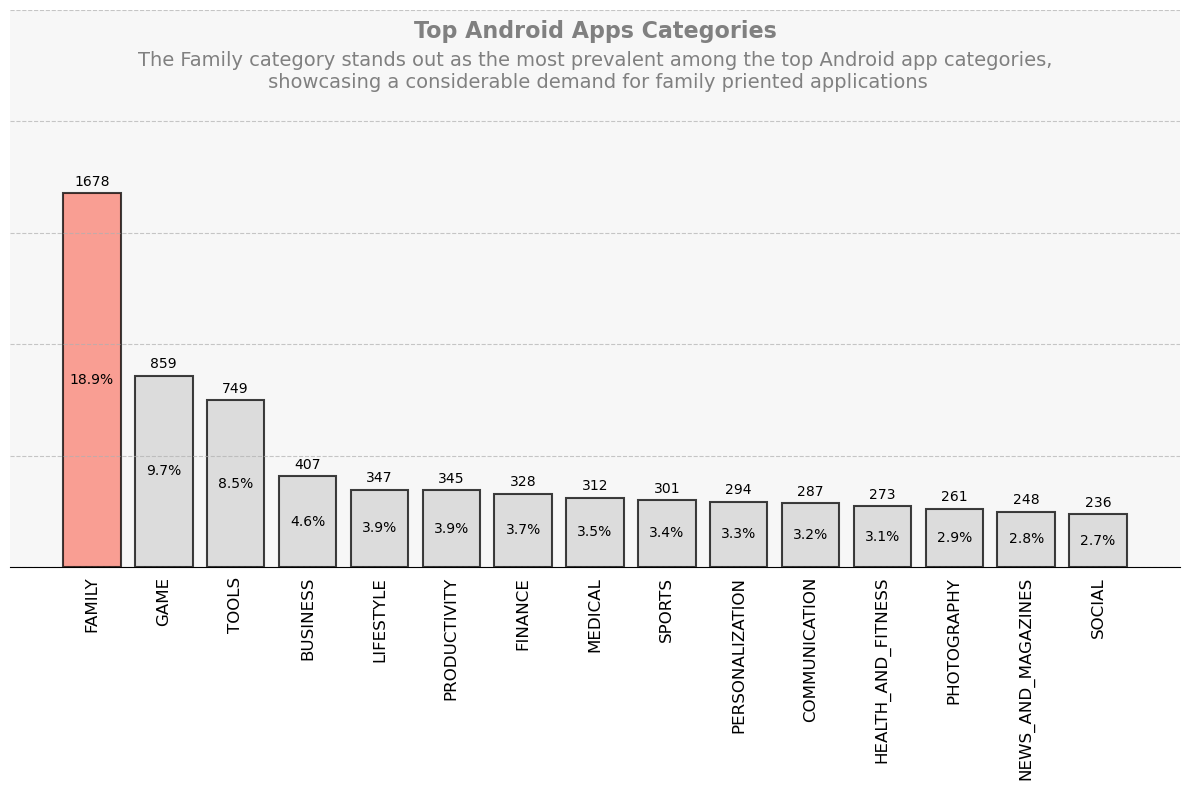

In [70]:
# DATA
categories = android_final["Category"].value_counts().index[:15]
counts = android_final["Category"].value_counts().values[:15]
percentage = round(android_final["Category"].value_counts(normalize = True)*100,1)[:15]


# Create stylish bar chart 
plt.figure(figsize=(12,8))
bars = plt.bar(categories, counts, color='lightgray', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
#plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--' , alpha=0.7)
plt.grid(axis='x', linestyle=' ')
plt.xticks(fontsize=12) #customize tick labels
plt.yticks(range(0, 3000, 500) , [], fontsize=12) #customize tick labels and customize y ticks range
#plt.yticks(range(0, 3000, 500) , [1,2,3,4,5], fontsize=12) ager numbers rakhny thay y axis per 
plt.tick_params(bottom = 0 , left = 0)

# Find the category with the highest count 
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count 
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

#Adding data labels and percentages inside each bar 
for bar, perc in zip(bars , percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height +20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
#adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding Chart title inside the chart 
plt.text(0.5, 0.95, 'Top Android Apps Categories', horizontalalignment='center', fontsize=16, transform=plt.gca().transAxes,
        color='grey', fontweight='bold')

#Adding conclusion inside the chart 
plt.text(0.5, 0.86, 'The Family category stands out as the most prevalent among the top Android app categories,\n showcasing a considerable demand for family priented applications'
         , horizontalalignment='center', fontsize=14, transform=plt.gca().transAxes, color='gray')

#Remove spine
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout() #Adjust layout to prevent clipping

plt.show()
    

# Most popular app by genre

In [73]:
# how to judge traffic >>>>by number of installations

android_final["Installs"].value_counts(normalize = True)*100


1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

In [74]:
android_final["Installs_int"]=android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)

C:\Users\almas\AppData\Local\Temp\ipykernel_12048\2909932235.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  android_final["Installs_int"]=android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)
C:\Users\almas\AppData\Local\Temp\ipykernel_12048\2909932235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_final["Installs_int"]=android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)


In [75]:
android_final["Installs_int"].value_counts() 

1000000       1395
100000        1024
10000000       932
10000          904
1000           745
100            613
5000000        606
500000         494
50000          423
5000           400
10             314
500            288
50000000       203
100000000      188
50             170
5               70
1               45
500000000       24
1000000000      20
0                5
Name: Installs_int, dtype: int64

In [76]:
android_final["Installs_int"].value_counts().sort_index()

0                5
1               45
5               70
10             314
50             170
100            613
500            288
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [77]:
android_final["Installs_int"]

0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_int, Length: 8863, dtype: int32

In [78]:
install_frq = android_final["Installs_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]   #filterout
install_frq 

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [79]:
install_frq_per = round(android_final["Installs_int"].value_counts(normalize=True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500] #percentage mae converted
install_frq_per

1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: Installs_int, dtype: float64

In [80]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [81]:
install_frq.index = install_frq.index.map(alphanumeric_units) #apply ki jaga map likho coz this series is not in dataframe 
install_frq

1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: Installs_int, dtype: int64

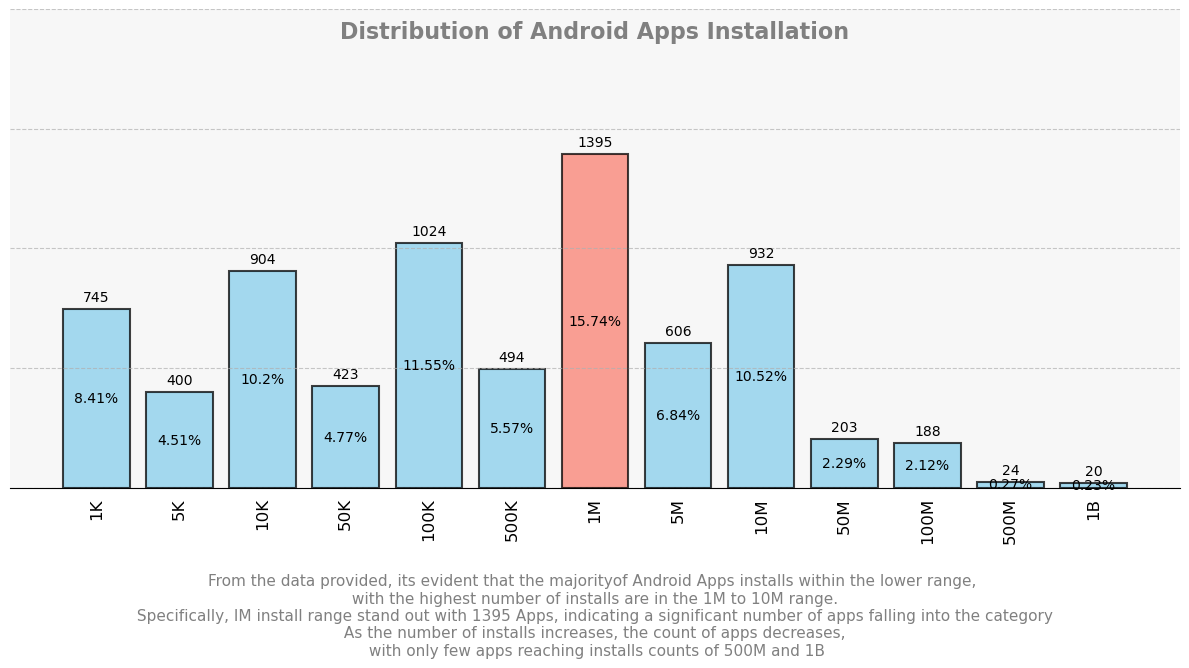

In [82]:
# DATA
categories = install_frq.index
counts = install_frq.values
percentage = install_frq_per.values

# Create stylish bar chart 
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
#plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')
plt.xticks(fontsize=12) #customize tick labels
plt.yticks(range(0, 2500, 500) , [], fontsize=12) #customize tick labels and customize y ticks range
#plt.yticks(range(0, 3000, 500) , [1,2,3,4,5], fontsize=12) ager numbers rakhny thay y axis per 
plt.tick_params(bottom = 0, left = 0)

# Find the category with the highest count 
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count 
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

#Adding data labels and percentages inside each bar 
for bar, perc in zip(bars , percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height +20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
#adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding Chart title inside the chart 
plt.text(0.5, 0.94, 'Distribution of Android Apps Installation', horizontalalignment='center', fontsize=16, transform=plt.gca().transAxes,
        color='gray', fontweight='bold')

#Adding conclusion inside the chart 
plt.text(0.5, -0.35, 'From the data provided, its evident that the majorityof Android Apps installs within the lower range, \n with the highest number of installs are in the 1M to 10M range. \n Specifically, IM install range stand out with 1395 Apps, indicating a significant number of apps falling into the category \n As the number of installs increases, the count of apps decreases, \n with only few apps reaching installs counts of 500M and 1B'
        , horizontalalignment='center', fontsize=11, transform=plt.gca().transAxes, color='gray')

#Remove spine
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout() #Adjust layout to prevent clipping

plt.show()

In [83]:
categories_android = android_final ["Category"].unique()

In [84]:
 pd.pivot_table(android_final, values='Installs_int', index='Category', aggfunc='mean')

Installs_int
Category                         
ART_AND_DESIGN       1.986335e+06
AUTO_AND_VEHICLES    6.473178e+05
BEAUTY               5.131519e+05
BOOKS_AND_REFERENCE  8.767812e+06
BUSINESS             1.712290e+06
COMICS               8.176573e+05
COMMUNICATION        3.845612e+07
DATING               8.540288e+05
EDUCATION            1.820673e+06
ENTERTAINMENT        1.164071e+07
EVENTS               2.535422e+05
FAMILY               3.694276e+06
FINANCE              1.387692e+06
FOOD_AND_DRINK       1.924898e+06
GAME                 1.556097e+07
HEALTH_AND_FITNESS   4.188822e+06
HOUSE_AND_HOME       1.331541e+06
LIBRARIES_AND_DEMO   6.385037e+05
LIFESTYLE            1.433676e+06
MAPS_AND_NAVIGATION  4.056942e+06
MEDICAL              1.206165e+05
NEWS_AND_MAGAZINES   9.549178e+06
PARENTING            5.426036e+05
PERSONALIZATION      5.201483e+06
PHOTOGRAPHY          1.780563e+07
PRODUCTIVITY         1.678733e+07
SHOPPING             7.036877e+06
SOCIAL               2.325365e+07
SPORTS               3.638640e+06
TOOLS                1.068230e+07
TRAVEL_AND_LOCAL     1.398408e+07
VIDEO_PLAYERS        2.472787e+07
WEATHER              5.074486e+06

In [85]:
#Display Dataframe without scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [86]:
categories_installs = pd.pivot_table(android_final, values='Installs_int', index='Category' , aggfunc='mean')
categories_installs = categories_installs.sort_values(by="Installs_int" , ascending=False)
categories_installs = categories_installs["Installs_int"] #want in series not in Datafrmae
categories_installs 

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [87]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.0f}'

In [88]:
categories_installs_unit = categories_installs.map(alphanumeric_units) 
categories_installs_unit

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

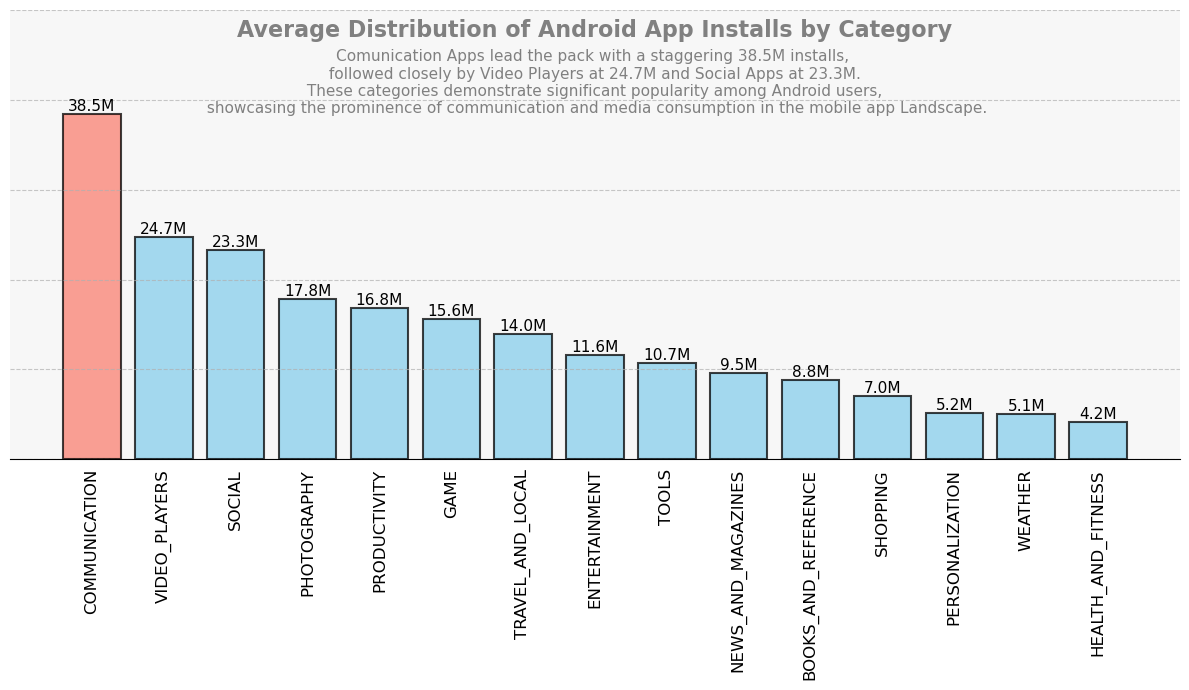

In [89]:
# DATA
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

# Create stylish bar chart 
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
#plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')
plt.xticks(fontsize=12) #customize tick labels
plt.yticks(range(0, 60000000, 10000000) , [], fontsize=12) #customize tick labels and customize y ticks range
#plt.yticks(range(0, 3000, 500) , [1,2,3,4,5], fontsize=12) ager numbers rakhny thay y axis per 
plt.tick_params(bottom = 0, left = 0)

# Find the category with the highest count 
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count 
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

#Adding data labels  
for bar, units in zip(bars, categories_installs_unit.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height +25, units , ha='center', va='bottom', fontsize=11)
        
#adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding Chart title inside the chart 
plt.text(0.5, 0.94, 'Average Distribution of Android App Installs by Category', horizontalalignment='center', fontsize=16, transform=plt.gca().transAxes,
        color='gray', fontweight='bold')

#Adding conclusion inside the chart 
plt.text(0.5, 0.77, 'Comunication Apps lead the pack with a staggering 38.5M installs, \n followed closely by Video Players at 24.7M and Social Apps at 23.3M. \n These categories demonstrate significant popularity among Android users, \n showcasing the prominence of communication and media consumption in the mobile app Landscape.'
        , horizontalalignment='center', fontsize=11, transform=plt.gca().transAxes, color='gray')
#Remove spine
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout() #Adjust layout to prevent clipping

plt.show()

In [90]:
category_group = android_final.groupby("Category")

In [91]:
COMMUNICATION = category_group.get_group("COMMUNICATION").sort_values(by='Installs_int', ascending=False)
COMMUNICATION.head()

App       Category Rating   Reviews  \
336                        WhatsApp Messenger  COMMUNICATION      4  69119316   
382  Messenger – Text and Video Chat for Free  COMMUNICATION      4  56646578   
464                                  Hangouts  COMMUNICATION      4   3419513   
411              Google Chrome: Fast & Secure  COMMUNICATION      4   9643041   
391             Skype - free IM & video calls  COMMUNICATION      4  10484169   

                   Size        Installs  Type Price Content Rating  \
336  Varies with device  1,000,000,000+  Free     0       Everyone   
382  Varies with device  1,000,000,000+  Free     0       Everyone   
464  Varies with device  1,000,000,000+  Free     0       Everyone   
411  Varies with device  1,000,000,000+  Free     0       Everyone   
391  Varies with device  1,000,000,000+  Free     0       Everyone   

            Genres    Last Updated         Current Ver         Android Ver  \
336  Communication  August 3, 2018  Varies with device  Varies with device   
382  Communication  August 1, 2018  Varies with device  Varies with device   
464  Communication   July 21, 2018  Varies with device  Varies with device   
411  Communication  August 1, 2018  Varies with device  Varies with device   
391  Communication  August 3, 2018  Varies with device  Varies with device   

     Installs_int  
336    1000000000  
382    1000000000  
464    1000000000  
411    1000000000  
391    1000000000

In [92]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.1f}'

In [93]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [94]:
df = COMMUNICATION[["App" , "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

App  Installs_int  \
336                                  WhatsApp Messenger    1000000000   
382            Messenger – Text and Video Chat for Free    1000000000   
464                                            Hangouts    1000000000   
411                        Google Chrome: Fast & Secure    1000000000   
391                       Skype - free IM & video calls    1000000000   
451                                               Gmail    1000000000   
403                         LINE: Free Calls & Messages     500000000   
4676                                    Viber Messenger     500000000   
420         UC Browser - Fast Download Private & Secure     500000000   
371               Google Duo - High Quality Video Calls     500000000   
383                       imo free video calls and chat     500000000   
393                                                 Who     100000000   
4633        UC Browser Mini -Tiny Fast Private & Secure     100000000   
4602  Truecaller: Caller ID, SMS spam blocking & Dialer     100000000   
4592                                           Telegram     100000000   

     Installs_int_unit  
336                 1B  
382                 1B  
464                 1B  
411                 1B  
391                 1B  
451                 1B  
403               500M  
4676              500M  
420               500M  
371               500M  
383               500M  
393               100M  
4633              100M  
4602              100M  
4592              100M

In [95]:
df = category_group.get_group("VIDEO_PLAYERS").sort_values(by="Installs_int", ascending=False)
df = df[["App" , "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

App  Installs_int  \
3665                                             YouTube    1000000000   
3687                             Google Play Movies & TV    1000000000   
3711                                           MX Player     500000000   
3675                                     VLC for Android     100000000   
4688              VivaVideo - Video Editor & Photo Movie     100000000   
4032                                            Dubsmash     100000000   
10647                                  Motorola FM Radio     100000000   
4696   VideoShow-Video Editor, Video Maker, Beauty Ca...     100000000   
3672                                    Motorola Gallery     100000000   
3691                               Samsung Video Library      50000000   
4038   DU Recorder – Screen Recorder, Video Editor, Live      50000000   
3693                LIKE – Magic Video Maker & Community      50000000   
3686                                          Vigo Video      50000000   
4049                       KineMaster – Pro Video Editor      50000000   
5612                                           Ringdroid      50000000   

      Installs_int_unit  
3665                 1B  
3687                 1B  
3711               500M  
3675               100M  
4688               100M  
4032               100M  
10647              100M  
4696               100M  
3672               100M  
3691                50M  
4038                50M  
3693                50M  
3686                50M  
4049                50M  
5612                50M

In [96]:
df = category_group.get_group("SOCIAL").sort_values(by="Installs_int", ascending=False)
df = df[["App" , "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

App  Installs_int Installs_int_unit
2544                                Facebook    1000000000                1B
2554                                 Google+    1000000000                1B
2604                               Instagram    1000000000                1B
2610                                Snapchat     500000000              500M
2546                           Facebook Lite     500000000              500M
3945          Tik Tok - including musical.ly     100000000              100M
2592            Tango - Live Video Broadcast     100000000              100M
6373                                      VK     100000000              100M
2552                               Pinterest     100000000              100M
3951                 BIGO LIVE - Live Stream     100000000              100M
2621                                LinkedIn     100000000              100M
2548                                  Tumblr     100000000              100M
2588          Badoo - Free Chat & Dating App     100000000              100M
2636                 Zello PTT Walkie Talkie      50000000               50M
2595  ooVoo Video Calls, Messaging & Stories      50000000               50M

In [97]:
df = category_group.get_group("PRODUCTIVITY").sort_values(by="Installs_int", ascending=False)
df = df[["App" , "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

App  Installs_int Installs_int_unit
3523                    Google Drive    1000000000                1B
3450                  Microsoft Word     500000000              500M
3562                 Google Calendar     500000000              500M
3574                     Cloud Print     500000000              500M
3473                         Dropbox     500000000              500M
3524            Adobe Acrobat Reader     100000000              100M
3489                   Samsung Notes     100000000              100M
3477                     Google Docs     100000000              100M
3493               SwiftKey Keyboard     100000000              100M
7808  CamScanner - Phone PDF Creator     100000000              100M
3469   ES File Explorer File Manager     100000000              100M
3486            Microsoft PowerPoint     100000000              100M
3467                     Google Keep     100000000              100M
3465               Microsoft OneNote     100000000              100M
3526                   Google Sheets     100000000              100M

# Conclusion

A trend in the popularity of photo-editing and collage-making apps is evident from the research of the photography category, where numerous apps have over 100 million installs. This suggests that customers have a high desire for photo-related features.

In light of this finding, there seems to be a good chance that a photo-generation application will be developed by 2024. With its quick and free photo and pattern generating, this app might capitalise on users' current interest in photography apps. Innovative features, simple use, and high-quality output could help this programme stand out from the competition and draw in a sizable user base.

Investing in the creation of a photo generation app seems promising for reaching into this profitable market segment in 2024, given the popularity of current photography apps and the changing preferences of consumers.
